<a href="https://colab.research.google.com/github/Deb052024/DeepLearning-PharmaIndustry/blob/main/Pharma_IndustrySales_Forecasting_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [2]:
df=pd.read_csv('/content/store.csv')

In [3]:
df1=pd.read_csv('/content/train.csv')

In [4]:
df3=pd.read_csv('/content/test.csv')

In [5]:
df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [6]:
df1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
df.shape

(1115, 10)

In [8]:
df1.shape

(1017209, 9)

In [9]:
df3.shape

(41088, 8)

In [10]:
df1.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [11]:
df1.duplicated().sum()

0

In [12]:
df.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [13]:
df1.duplicated().sum()

0

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**Merging Data Set sample and Test and storing them in a new Data Frame DF2**

In [16]:
df2=pd.merge(df,df1,on='Store',how='inner')
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [ ]:
df2.shape

(1017209, 18)

In [ ]:
df4=df3.merge(df,on='Store',how='inner')
df4.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [17]:
df2.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,2642
CompetitionOpenSinceMonth,323348
CompetitionOpenSinceYear,323348
Promo2,0
Promo2SinceWeek,508031
Promo2SinceYear,508031
PromoInterval,508031


**Filling the Null Values in DF2**

In [18]:
# Fill null values in 'CompetitionDistance' with the median
df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].median(), inplace=True)

# Fill null values in categorical columns with 'unknown'
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']:
  df2[col].fillna('unknown', inplace=True)

**Fill the Null values other than 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval',CompetitionDistance**

In [19]:
# Fill null values in other columns with the most frequent value (mode)
for col in df2.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                   'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df2[col].dtype == 'object':
            df2[col].fillna(df2[col].mode()[0], inplace=True)
        elif df2[col].dtype in ['int64', 'float64']:
            df2[col].fillna(df2[col].median(), inplace=True)

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1017209 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  object 
 5   CompetitionOpenSinceYear   1017209 non-null  object 
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            1017209 non-null  object 
 8   Promo2SinceYear            1017209 non-null  object 
 9   PromoInterval              1017209 non-null  object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

**Convert the object data type of features to string and then apply label encode**

In [21]:
from sklearn.preprocessing import LabelEncoder

# Convert object data type features to string
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = df2[col].astype(str)

# Apply Label Encoding to object type columns
le = LabelEncoder()
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = le.fit_transform(df2[col])

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  int64  
 2   Assortment                 1017209 non-null  int64  
 3   CompetitionDistance        1017209 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  int64  
 5   CompetitionOpenSinceYear   1017209 non-null  int64  
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            1017209 non-null  int64  
 8   Promo2SinceYear            1017209 non-null  int64  
 9   PromoInterval              1017209 non-null  int64  
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  int64  
 12  Sales                      1017209 non-null  int64  
 13  Customers   

**correlation and HeatMap**

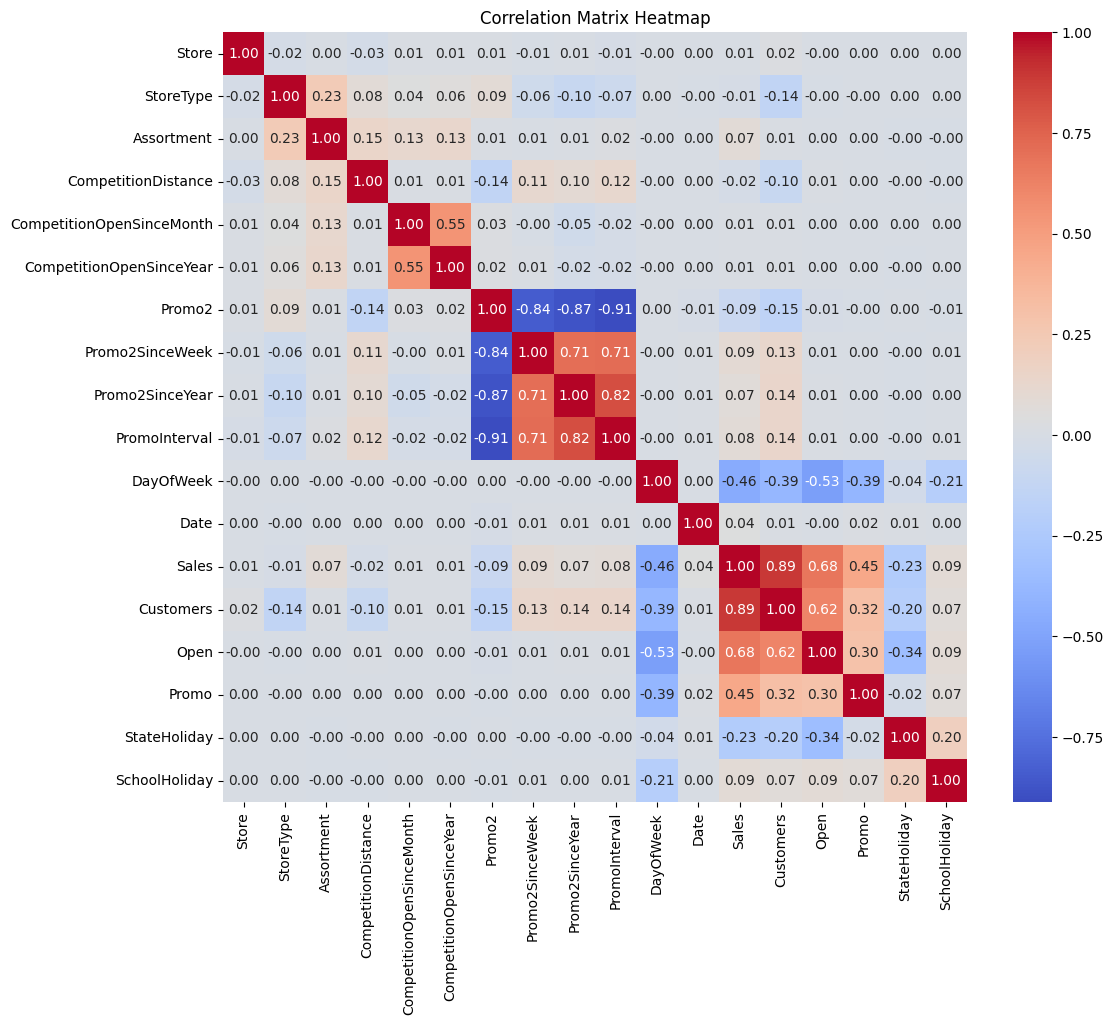

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')


# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Finding  the features that have more than 0.5 correlation coefficient with sales**

In [24]:

# Get the correlation of all features with 'Sales'
sales_correlation = correlation_matrix['Sales'].drop('Sales')

# Print features with correlation greater than 0.5
print("Features with correlation coefficient > 0.5 with Sales:")
for feature, correlation in sales_correlation.items():
  if abs(correlation) > 0.5:
    print(f"{feature}: {correlation}")

Features with correlation coefficient > 0.5 with Sales:
Customers: 0.8947107733017349
Open: 0.678472346014201


**Finding the features that positive correlation coefficient with sales with Descending Order**

In [25]:
# Finding the features that positive correlation coefficient with sales with Descending Order
positive_sales_correlation = sales_correlation[sales_correlation > 0]
positive_sales_correlation_sorted = positive_sales_correlation.sort_values(ascending=False)

print("\nFeatures with positive correlation coefficient with Sales (descending order):")
positive_sales_correlation_sorted


Features with positive correlation coefficient with Sales (descending order):


,Sales
Customers,0.894711
Open,0.678472
Promo,0.452345
Promo2SinceWeek,0.089716
SchoolHoliday,0.085124
PromoInterval,0.079829
Assortment,0.074941
Promo2SinceYear,0.073038
Date,0.041904
CompetitionOpenSinceYear,0.014257


**Select K best Method and print the features that are having more than 0.5 correlation coefficient with sales**

In [ ]:

from sklearn.feature_selection import SelectKBest, f_regression

# Assuming 'df2' is your DataFrame and 'Sales' is your target variable
X = df2.drop('Sales', axis=1)
y = df2['Sales']

# Check for NaN values in X and replace them with the median of each column
for col in X.columns:
    if X[col].isnull().any():
        X[col].fillna(X[col].median(), inplace=True)

# Apply SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k='all') #k='all' to consider all features. You can specify 'k' for top k features.
X_new = selector.fit_transform(X, y)

# Get feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Print the feature importance
feature_scores

,Feature,Score
12,Customers,4.081763e+06
13,Open,8.676431e+05
10,DayOfWeek,2.762247e+05
14,Promo,2.616805e+05
15,StateHoliday,5.631061e+04
6,Promo2,8.501293e+03
7,Promo2SinceWeek,8.253983e+03
16,SchoolHoliday,7.424585e+03
9,PromoInterval,6.523912e+03
2,Assortment,5.745017e+03


In [ ]:
df2['StoreType'].value_counts()

,count
StoreType,
0,551627
3,312912
2,136840
1,15830


**Sales and Storetype Bar Plot**

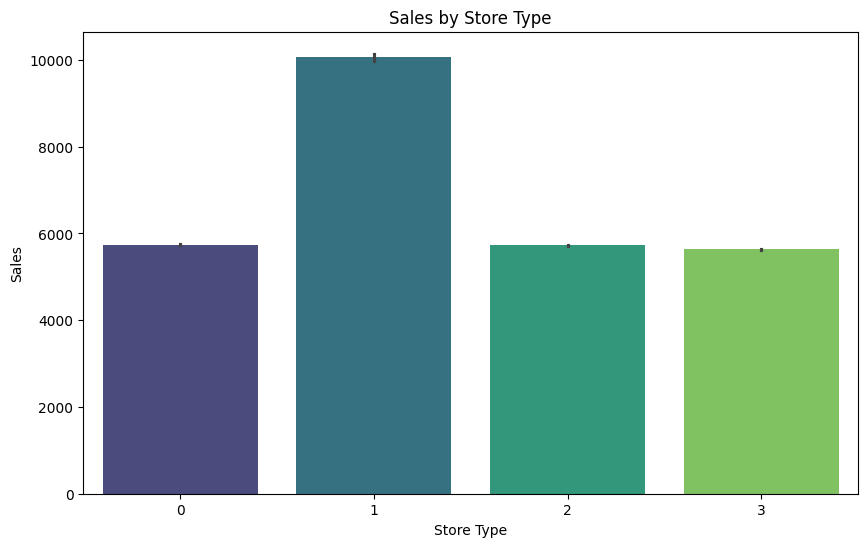

In [26]:

plt.figure(figsize=(10, 6))
sns.barplot(x='StoreType', y='Sales', data=df2, palette='viridis')
plt.title('Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

**Time series and sales Plot**

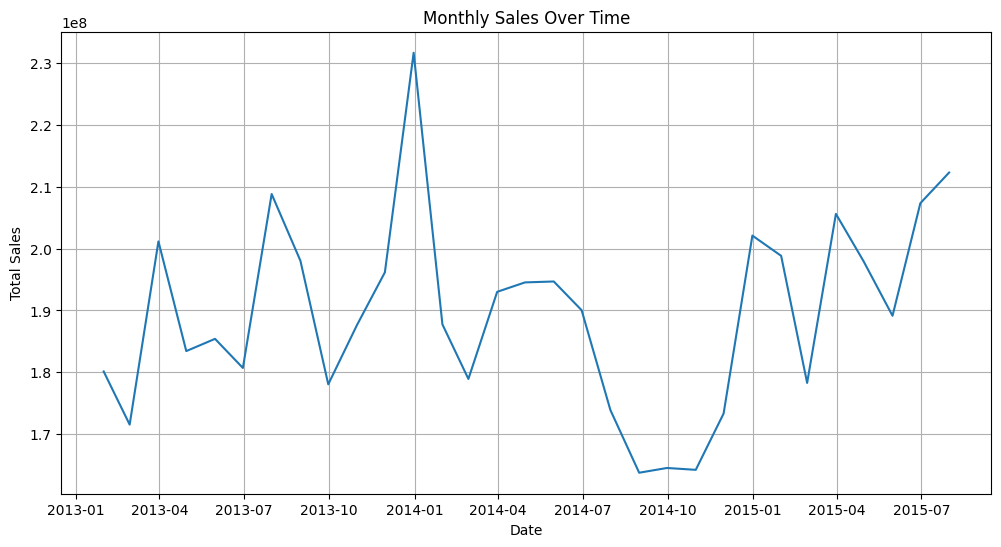

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df2=pd.merge(df,df1,on='Store',how='inner')

# Convert 'Date' column to datetime objects if it's not already
df2['Date'] = pd.to_datetime(df2['Date'])

# Set 'Date' as the index
df2 = df2.set_index('Date')

# Resample to a desired frequency (e.g., monthly) and sum the sales
df2_monthly = df2['Sales'].resample('M').sum()

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(df2_monthly)
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

**Assortment  and Sales Bar Plot**

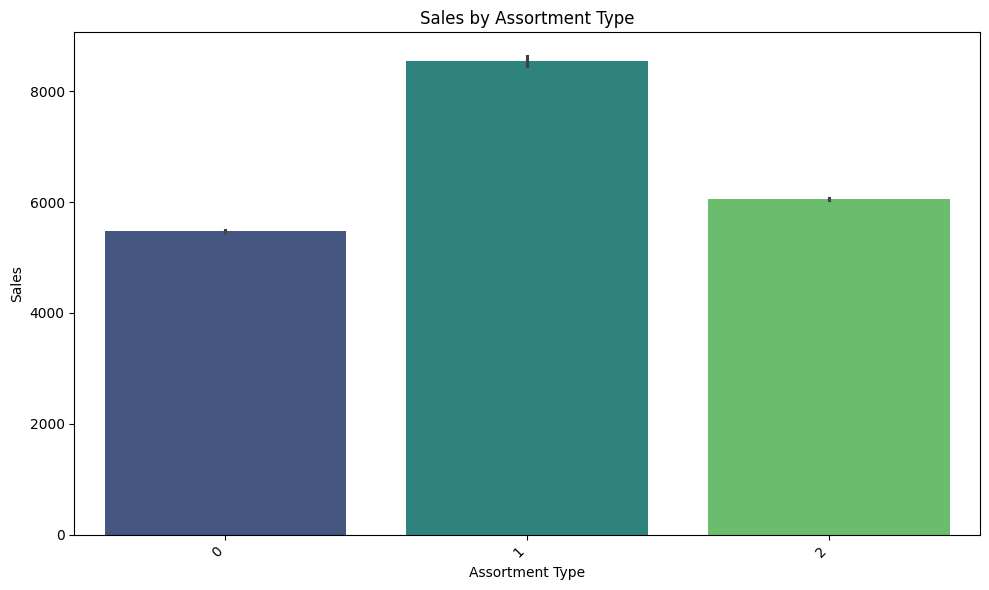

In [27]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

# Assortment and Sales Bar Plot with Different Colors
plt.figure(figsize=(10, 6))
sns.barplot(x='Assortment', y='Sales', data=df2, palette='viridis')
plt.title('Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

**Compare the distribution of promotions across data frame**

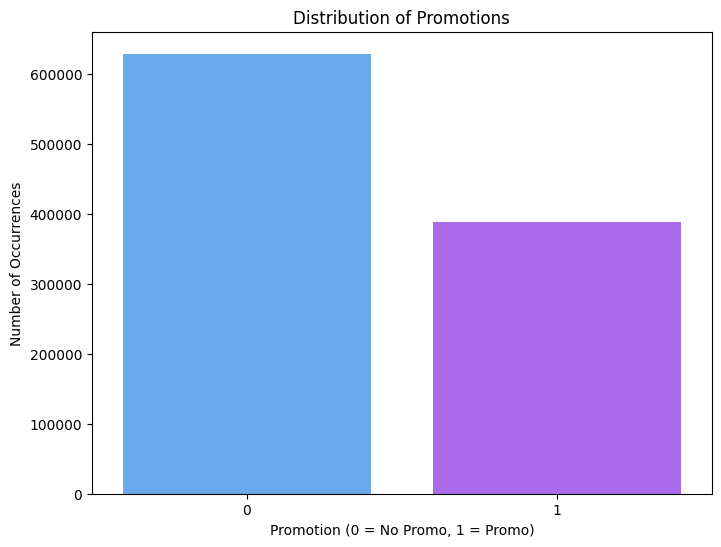

In [28]:

# Check for the presence of the 'Promo' column before proceeding
if 'Promo' in df2.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Promo', data=df2, palette='cool')  # Use a different color palette
    plt.title('Distribution of Promotions')
    plt.xlabel('Promotion (0 = No Promo, 1 = Promo)')
    plt.ylabel('Number of Occurrences')
    plt.show()
else:
    print("'Promo' column not found in the DataFrame. Please check the column name.")

In [ ]:
df2['Promo'].skew()

0.4878378482245114

In [29]:
import pandas as pd

# Group by 'Store' and sum 'Sales'
store_sales = df2.groupby('Store')['Sales'].sum()

# Get the top 10 stores with the highest sales
top_10_stores = store_sales.nlargest(10)

print("Top 10 Stores with Highest Sales:")
top_10_stores

Top 10 Stores with Highest Sales:


,Sales
Store,
262,19516842
817,17057867
562,16927322
1114,16202585
251,14896870
513,14252406
788,14082141
733,14067158
383,13489879


**Treating the Ouliers Present in the DataFrame**

In [37]:
import pandas as pd
import numpy as np

def treat_outliers_capping(df2):
    """
    Finds outliers in numerical features of a DataFrame and treats them by capping.

    Args:
        df2: The input DataFrame.

    Returns:
        DataFrame with treated outliers.
    """

    numerical_features = df2.select_dtypes(include=np.number).columns
    for feature in numerical_features:
        Q1 = df2[feature].quantile(0.25)
        Q3 = df2[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df2[feature] = np.clip(df2[feature], lower_bound, upper_bound)

    return df2

# Example usage (assuming df2 is your DataFrame):
df2 = treat_outliers_capping(df2)

**Box plot with hue as PromoInterval and finding the average sales with and without promotion after treating the outliers**

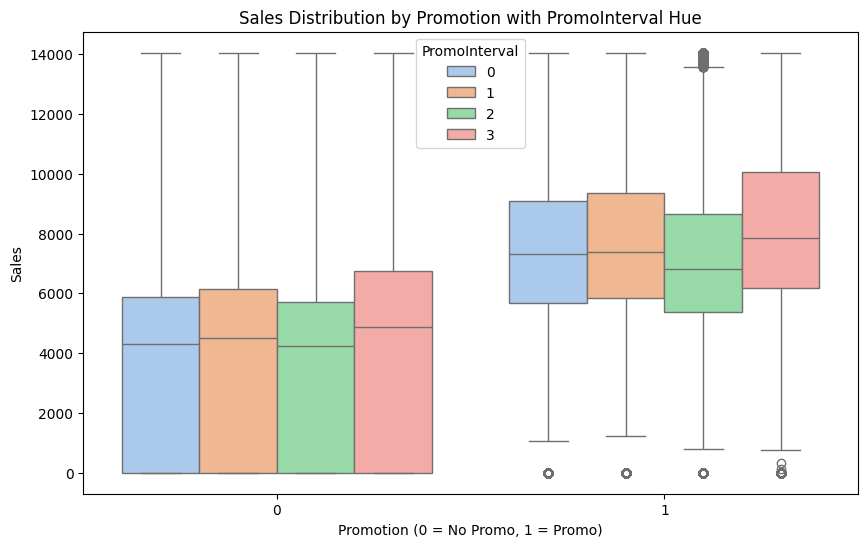

Average sales with promotion: 7836.013738146774
Average sales without promotion: 4367.5386963563915


In [38]:


plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=df2, hue='PromoInterval', palette='pastel')
plt.title('Sales Distribution by Promotion with PromoInterval Hue')
plt.xlabel('Promotion (0 = No Promo, 1 = Promo)')
plt.ylabel('Sales')
plt.show()

# Calculate the average sales with and without promotion
average_sales_with_promo = df2[df2['Promo'] == 1]['Sales'].mean()
average_sales_without_promo = df2[df2['Promo'] == 0]['Sales'].mean()

print(f"Average sales with promotion: {average_sales_with_promo}")
print(f"Average sales without promotion: {average_sales_without_promo}")

**Box plot of Promo  with sales , then find the average sales with and without promotion after**

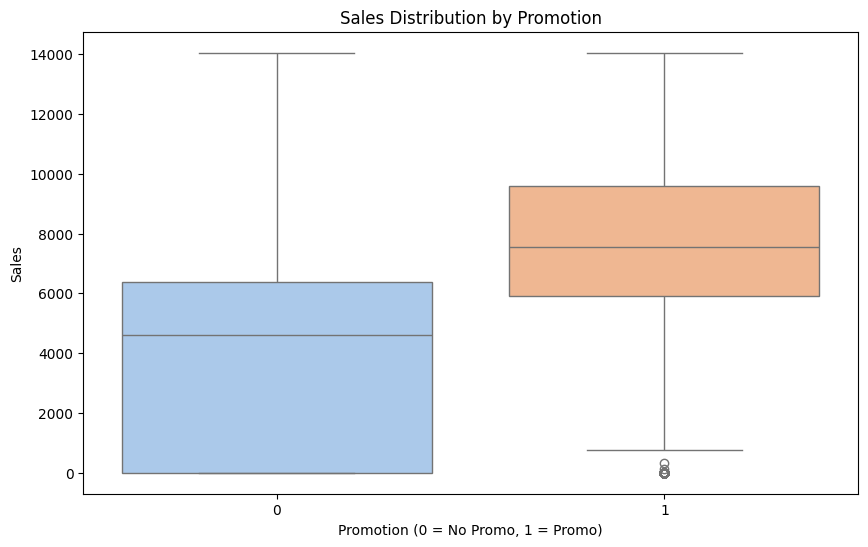

Average sales with promotion: 7836.013738146774
Average sales without promotion: 4367.5386963563915


In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=df2, palette='pastel')
plt.title('Sales Distribution by Promotion')
plt.xlabel('Promotion (0 = No Promo, 1 = Promo)')
plt.ylabel('Sales')
plt.show()

# Calculate the average sales with and without promotion
average_sales_with_promo = df2[df2['Promo'] == 1]['Sales'].mean()
average_sales_without_promo = df2[df2['Promo'] == 0]['Sales'].mean()

print(f"Average sales with promotion: {average_sales_with_promo}")
print(f"Average sales without promotion: {average_sales_without_promo}")

**Correlation between Competition Distance and Sales and plot bar with different bar colors**

Correlation between Competition Distance and Sales: -0.01702678733611174
CompetitionDistance_binned
(3.86, 1634.0]        5843.554919
(1634.0, 3248.0]      5577.744703
(3248.0, 4862.0]      5565.823672
(4862.0, 6476.0]      5435.452355
(6476.0, 8090.0]      5691.272258
(8090.0, 9704.0]      5634.399849
(9704.0, 11318.0]     5536.499342
(11318.0, 12932.0]    5728.112574
(12932.0, 14546.0]    5417.859126
(14546.0, 16160.0]    5679.213774
Name: Sales, dtype: float64


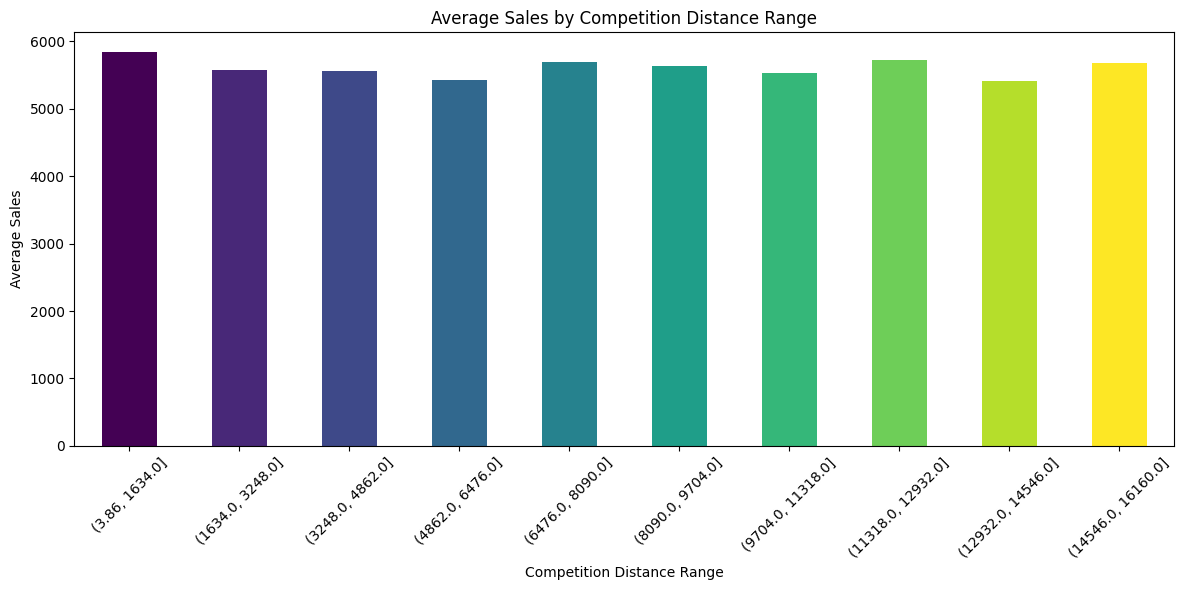

In [ ]:
# Calculate the correlation coefficient
correlation = df2['CompetitionDistance'].corr(df2['Sales'])
print(f"Correlation between Competition Distance and Sales: {correlation}")

#Binning data
df2['CompetitionDistance_binned'] = pd.cut(df2['CompetitionDistance'], bins=10)  # Adjust number of bins

# Calculate mean sales per bin
sales_by_distance_bin = df2.groupby('CompetitionDistance_binned')['Sales'].mean()
print(sales_by_distance_bin)

# Plot the average sales for different competition distance ranges
plt.figure(figsize=(12, 6))
sales_by_distance_bin.plot(kind='bar',color=plt.cm.viridis(np.linspace(0, 1, len(sales_by_distance_bin))))
plt.xlabel('Competition Distance Range')
plt.ylabel('Average Sales')
plt.title('Average Sales by Competition Distance Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Featured Engineering Field- Average Sales of Week**

DayOfWeek
3    5690.812276
Name: Sales, dtype: float64


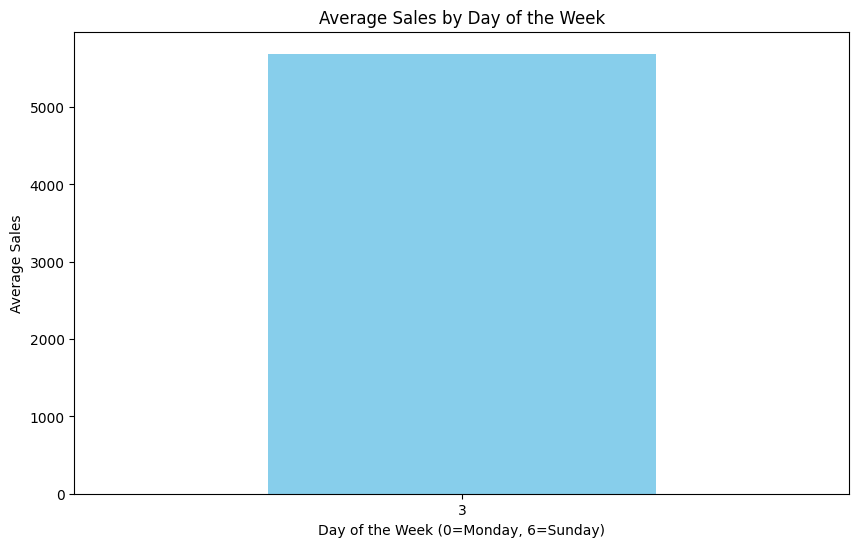

In [41]:
# Calculate average sales for each day of the week
df2['DayOfWeek'] = pd.to_datetime(df2['Date']).dt.dayofweek  # Assuming 'Date' column exists
average_sales_by_day = df2.groupby('DayOfWeek')['Sales'].mean()

# Print the result
print(average_sales_by_day)

#Optional: Create a bar plot to visualize the average sales for each day of the week
plt.figure(figsize=(10, 6))
average_sales_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df2.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance_binned
Date,,,,,,,,,,,,,,,,,,
2013-01-05,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,4771.0,339,1,0,0,0,"(4862.0, 6476.0]"
2013-01-04,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,4540.0,326,1,0,0,0,"(4862.0, 6476.0]"
2013-01-03,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,4297.0,300,1,0,0,0,"(4862.0, 6476.0]"
2013-01-02,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,3697.0,305,1,0,0,0,"(4862.0, 6476.0]"
2013-01-01,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2,0.0,0,1,0,a,0,"(4862.0, 6476.0]"


In [ ]:
df[:-12].tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1098,1099,a,c,200.0,4.0,2013.0,1,14.0,2013.0,"Jan,Apr,Jul,Oct"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1100,1101,d,c,4060.0,9.0,2012.0,0,NaN,NaN,NaN
1101,1102,a,a,850.0,11.0,2012.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
1102,1103,d,c,1340.0,10.0,2006.0,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
df2[:-12].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance_binned
Date,,,,,,,,,,,,,,,,,,
2015-07-31,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,5263.0,555,1,1,0,0,"(3.86, 1634.0]"
2015-07-30,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,5020.0,546,1,1,0,0,"(3.86, 1634.0]"
2015-07-29,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,4782.0,523,1,1,0,0,"(3.86, 1634.0]"
2015-07-28,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,5011.0,560,1,1,0,0,"(3.86, 1634.0]"
2015-07-27,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,6102.0,612,1,1,0,0,"(3.86, 1634.0]"


**Build an ARIMA MODEL with time series data and Sales**

In [42]:


from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math

# Assuming 'df2' is your DataFrame with 'Date' as index and 'Sales' column
# and it has already been preprocessed as shown in your provided code.

# Prepare data for time series analysis
# Convert index to datetime if not already
df2.index = pd.to_datetime(df2.index)

# Split data into training and testing sets
train_data = df2['Sales'][:-12]  # Last 12 data points for testing
test_data = df2['Sales'][-12:]

# Build and train the ARIMA model
# (p, d, q) are the model orders - you need to find the optimal values using techniques like ACF and PACF plots
# or automated order selection methods.  These values are placeholders.
model = ARIMA(train_data, order=(5,1,0))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train_data), end=len(df2['Sales']) - 1)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


In [43]:
# Evaluate the model
rmse = math.sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2656.662


**Build an SARIMA MODEL with time series data and Sales**

Root Mean Squared Error: 21658322.601663787


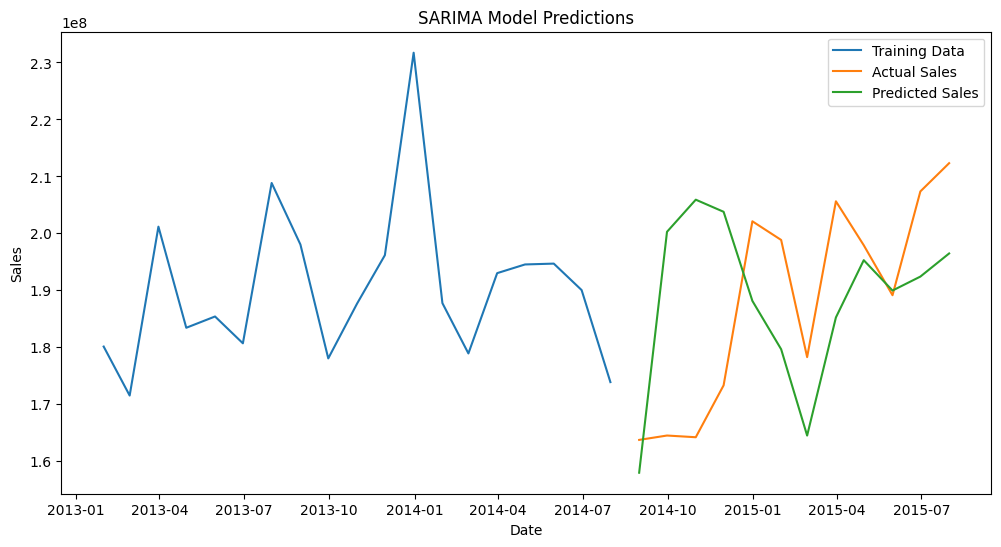

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

# Load your data (replace with your actual file paths)
df = pd.read_csv('/content/store.csv')
df1 = pd.read_csv('/content/train.csv')

# Merge the datasets (assuming you have 'Store' as a common column)
df2 = pd.merge(df, df1, on='Store', how='inner')



# Convert 'Date' to datetime and set as index
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.set_index('Date')

# Resample the data to monthly frequency
df2_monthly = df2['Sales'].resample('M').sum()

# Split data into training and testing sets
train_data = df2_monthly[:-12]
test_data = df2_monthly[-12:]

# Fit the SARIMA model
# Experiment with different (p, d, q) and (P, D, Q, s) values
try:
    model = SARIMAX(train_data, order=(5, 1, 0), seasonal_order=(1, 1, 2, 6)) # Example order, adjust as needed
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.predict(start=len(train_data), end=len(df2_monthly)-1)

    # Evaluate the model
    rmse = mean_squared_error(test_data, predictions, squared=False)
    print(f"Root Mean Squared Error: {rmse}")

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(train_data, label='Training Data')
    plt.plot(test_data, label='Actual Sales')
    plt.plot(predictions, label='Predicted Sales')
    plt.title('SARIMA Model Predictions')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
df2.columns

In [ ]:
df2.info()

**Investigate seasonal purchasing patterns (e.g., Christmas, Easter).**

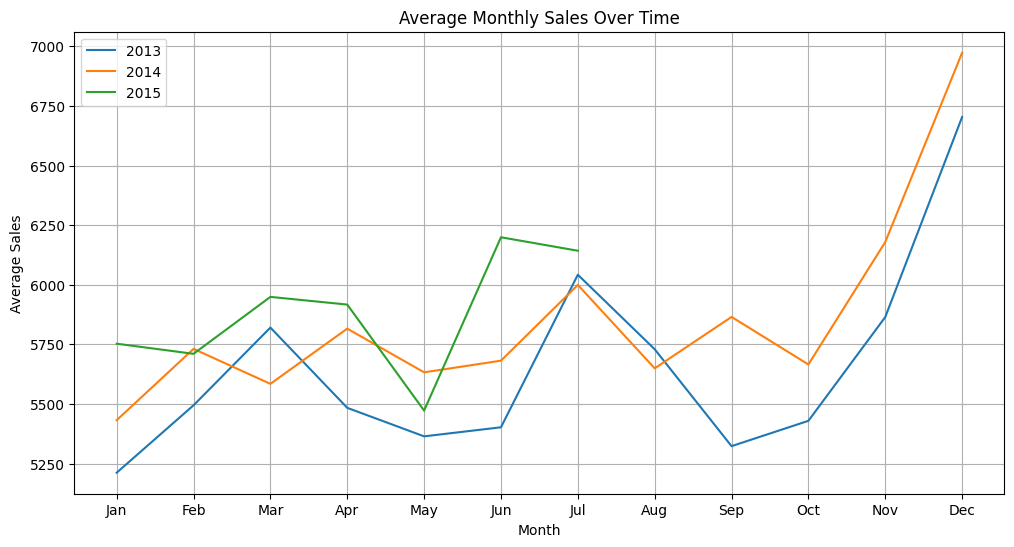

Year
2013    6703.618140
2014    6973.282456
Name: Sales, dtype: float64


In [ ]:


import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual file paths)
df = pd.read_csv('/content/store.csv')
df1 = pd.read_csv('/content/train.csv')

# Merge the datasets (assuming you have 'Store' as a common column)
df2 = pd.merge(df, df1, on='Store', how='inner')

# Convert 'Date' to datetime if it's not already
df2['Date'] = pd.to_datetime(df2['Date'])

# Extract month and year for easier analysis
df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year

# Group by month and year to calculate average sales for each month
monthly_sales = df2.groupby(['Month', 'Year'])['Sales'].mean().reset_index()

# Plot average sales for each month across different years
plt.figure(figsize=(12, 6))
for year in monthly_sales['Year'].unique():
    year_data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(year_data['Month'], year_data['Sales'], label=str(year))

plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Monthly Sales Over Time')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

# Further analysis (optional):
# 1. Calculate the average sales for specific months (e.g., December for Christmas)
# 2. Compare sales in those months across different years.
# 3. Consider using a boxplot to visualize the distribution of sales in specific months.
# Example for December:
december_sales = df2[df2['Month'] == 12]
print(december_sales.groupby('Year')['Sales'].mean())

**Investigate seasonal purchasing patterns (e.g., Christmas, Easter).December average sales, rest of months other than december average sale**

In [ ]:
# Load your data (replace with your actual file paths)
df = pd.read_csv('/content/store.csv')
df1 = pd.read_csv('/content/train.csv')

# Merge the datasets (assuming you have 'Store' as a common column)
df2 = pd.merge(df, df1, on='Store', how='inner')

# Convert 'Date' to datetime if it's not already
df2['Date'] = pd.to_datetime(df2['Date'])

# Extract month and year for easier analysis
df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year

# Calculate December average sales
december_sales = df2[df2['Month'] == 12]['Sales'].mean()

# Calculate average sales for months other than December
other_months_sales = df2[df2['Month'] != 12]['Sales'].mean()

print(f"Average December Sales: {december_sales}")
print(f"Average Sales (excluding December): {other_months_sales}")

Average December Sales: 6826.611376868607
Average Sales (excluding December): 5703.662913053828


**Average Monthly Sales During Holiday and Non Holiday Months**

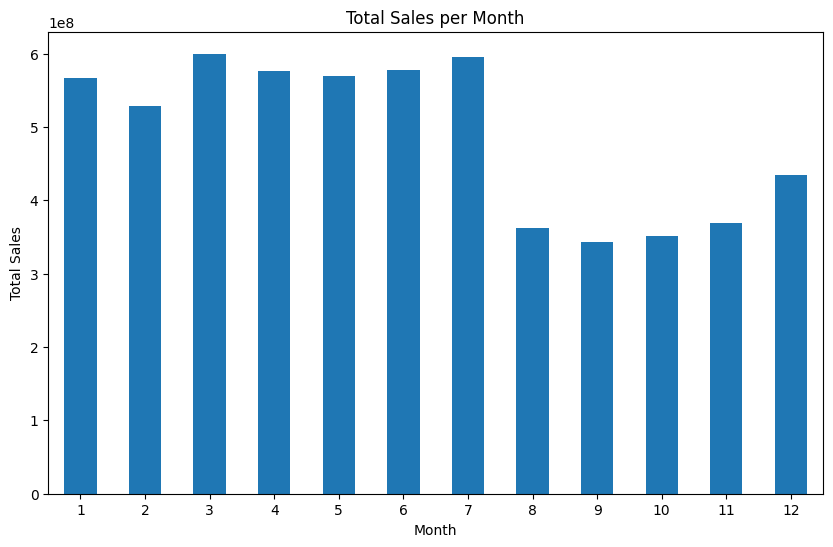

December Sales: 433831153
Average Sales in other months: 494486315.45454544
Average Sales in Christmas period: 7137.474364723468
Average Sales outside Christmas period: 5755.6428594910085


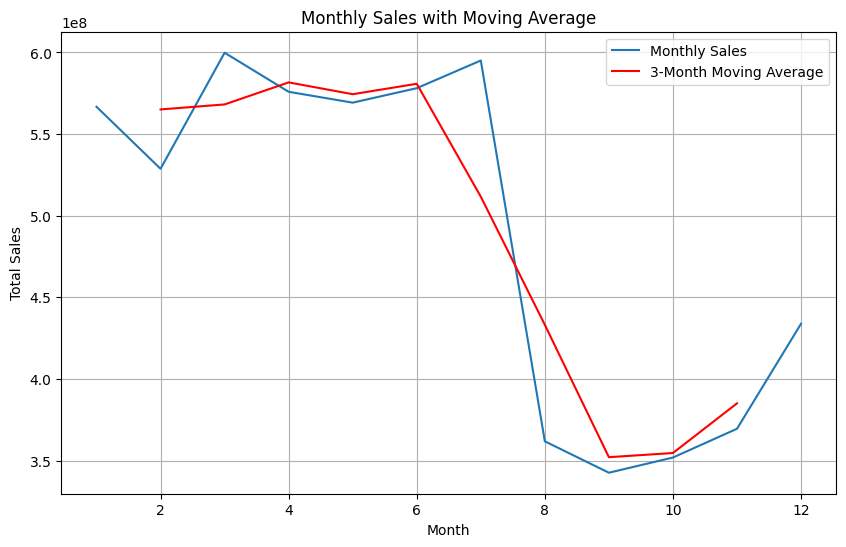

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual file paths)
df = pd.read_csv('/content/store.csv')
df1 = pd.read_csv('/content/train.csv')

# Merge the datasets (assuming you have 'Store' as a common column)
df2 = pd.merge(df, df1, on='Store', how='inner')
df2['Date']=pd.to_datetime(df2['Date'])



# Group data by month and calculate total sales
df2['Month'] = df2['Date'].dt.month
monthly_sales = df2.groupby('Month')['Sales'].sum()

# Plot monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month')
plt.xticks(rotation=0)
plt.show()

# Identify potential seasonal patterns (e.g., December for Christmas)
# Example: Analyze sales in December compared to other months
december_sales = monthly_sales[12]  # Assuming December is month 12
average_sales_other_months = monthly_sales[monthly_sales.index != 12].mean()

print(f"December Sales: {december_sales}")
print(f"Average Sales in other months: {average_sales_other_months}")

# Further analysis: Compare sales during holiday periods with other periods.
# Consider using statistical tests to confirm significance.

# For example, create a function to check if a date falls within a holiday period:

def is_holiday_period(date):
    # Define the holiday periods (example: Christmas)
    christmas_start = pd.to_datetime('2013-12-15')
    christmas_end = pd.to_datetime('2013-12-26')
    # Add more holiday periods as needed
    if christmas_start <= date <= christmas_end:
      return True
    return False

df2['IsChristmasPeriod'] = df2['Date'].apply(is_holiday_period)

# Calculate average sales for Christmas Period
christmas_sales = df2[df2['IsChristmasPeriod']]['Sales'].mean()
print(f"Average Sales in Christmas period: {christmas_sales}")


# Analyze sales in the Christmas period compared to the non-Christmas period
non_christmas_sales = df2[~df2['IsChristmasPeriod']]['Sales'].mean()
print(f"Average Sales outside Christmas period: {non_christmas_sales}")


# Calculate and plot monthly sales with a moving average to smooth out noise
window_size = 3  # Example window size for moving average
monthly_sales_ma = monthly_sales.rolling(window=window_size, center=True).mean()


plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.plot(monthly_sales_ma, label='3-Month Moving Average', color='red')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales with Moving Average')
plt.legend()
plt.grid(True)
plt.show()


**Assess correlations between sales and customer numbers**

Correlation between Sales and Customers: 0.9208048531996542


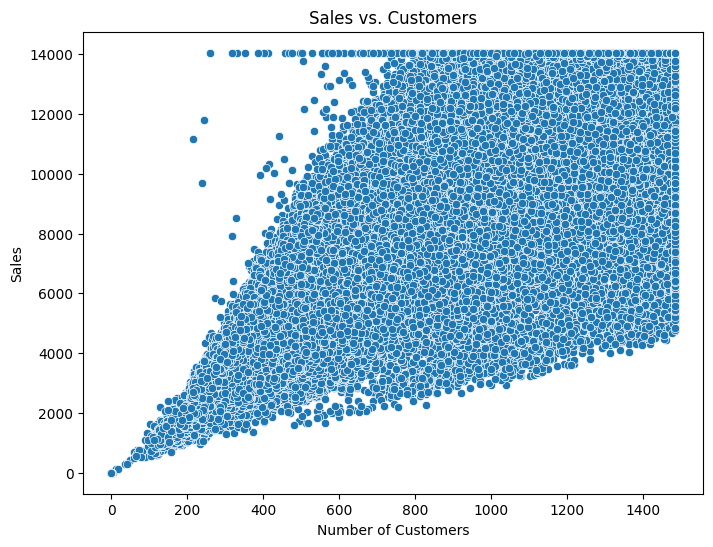

In [44]:
# Calculate the correlation between 'Customers' and 'Sales'
correlation_sales_customers = df2['Customers'].corr(df2['Sales'])
print(f"Correlation between Sales and Customers: {correlation_sales_customers}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Customers', y='Sales', data=df2)
plt.title('Sales vs. Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

**Evaluate the impact of promotions on customer behavior**

In [ ]:
# Group data by 'Promo' and calculate average sales
promo_impact = df2.groupby('Promo')['Sales'].mean()

# Print the average sales for promo and non-promo days
print(promo_impact)

#Further analysis (optional)
# Statistical tests to determine significance of promo impact

from scipy.stats import ttest_ind

# Separate sales data for promo and non-promo days
sales_with_promo = df2[df2['Promo'] == 1]['Sales']
sales_without_promo = df2[df2['Promo'] == 0]['Sales']

# Perform an independent samples t-test
t_statistic, p_value = ttest_ind(sales_with_promo, sales_without_promo)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in sales between promotion and no promotion days.")
else:
    print("There is no statistically significant difference in sales between promotion and no promotion days.")


Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64
T-statistic: 511.5471867316377
P-value: 0.0
There is a statistically significant difference in sales between promotion and no promotion days.


In [ ]:
df2.columns

**Examine trends of sales based on store opening/closing times**

         count         mean         std  min     25%     50%     75%      max
Open                                                                         
0     172817.0     0.000000     0.00000  0.0     0.0     0.0     0.0      0.0
1     844392.0  6955.514291  3104.21468  0.0  4859.0  6369.0  8360.0  41551.0


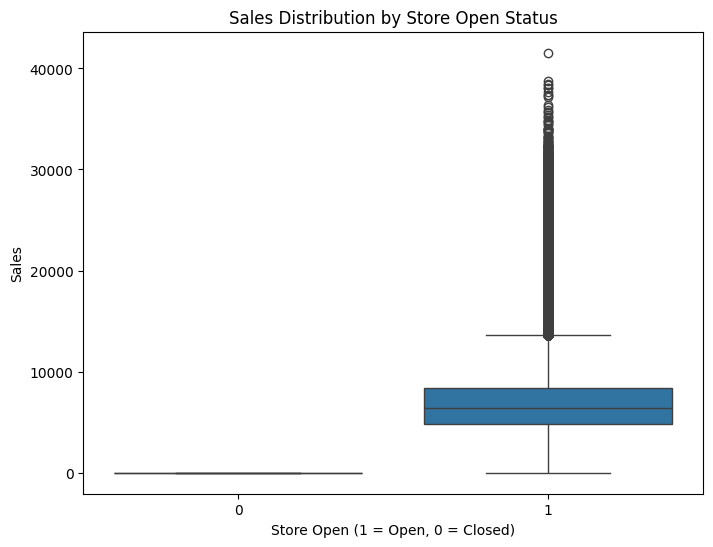

<Figure size 1000x600 with 0 Axes>

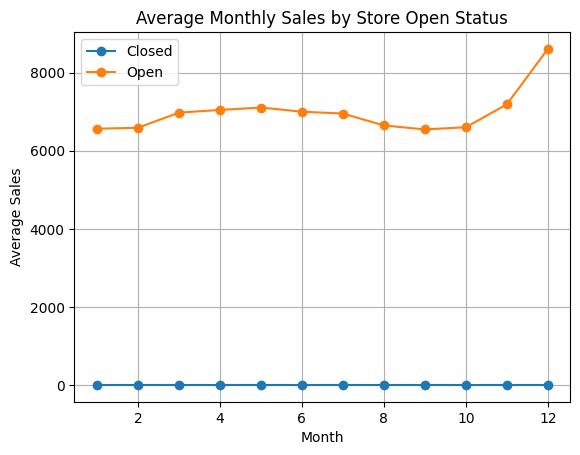

In [ ]:

# Convert 'Date' to datetime if it's not already
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.set_index('Date')

# Group data by 'Open' status and calculate descriptive statistics of sales
sales_by_open_status = df2.groupby('Open')['Sales'].describe()

print(sales_by_open_status)

# Visualize the distribution of sales for open and closed stores using boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x='Open', y='Sales', data=df2)
plt.title('Sales Distribution by Store Open Status')
plt.xlabel('Store Open (1 = Open, 0 = Closed)')
plt.ylabel('Sales')
plt.show()

#Further analysis (optional)
# Statistical test to compare sales distributions
# Separate sales data for open and closed stores

# Analyze sales trends over time for open and closed stores
# Group by month and then open status


# Group data by month and open status and calculate average sales
monthly_sales_by_open_status = df2.groupby([df2.index.month, 'Open'])['Sales'].mean().unstack()

# Plot monthly sales for open and closed stores
plt.figure(figsize=(10, 6))
monthly_sales_by_open_status.plot(kind='line', marker='o')  # Use line plot
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Monthly Sales by Store Open Status')
plt.legend(['Closed', 'Open']) # set legend
plt.grid(True)
plt.show()

**Task-2-Sales Prediction**

**Handle Missing values and scale Data**

In [ ]:


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns
numerical_cols = df2.select_dtypes(include=['number']).columns
categorical_cols = df2.select_dtypes(include=['object']).columns

# Handle missing values in numerical columns using imputation (e.g., mean)
imputer = SimpleImputer(strategy='mean')  # other strategies like 'median' or 'most_frequent'
df2[numerical_cols] = imputer.fit_transform(df2[numerical_cols])

# Handle missing values in categorical columns using imputation (e.g., most frequent)
imputer_categorical = SimpleImputer(strategy='most_frequent')
df2[categorical_cols] = imputer_categorical.fit_transform(df2[categorical_cols])

# Scale numerical features using StandardScaler
scaler = StandardScaler()
df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])

print(df2.head())

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

# Load your data (replace with your actual file paths)
df = pd.read_csv('/content/store.csv')
df1 = pd.read_csv('/content/train.csv')

# Merge the datasets (assuming you have 'Store' as a common column)
df2 = pd.merge(df, df1, on='Store', how='inner')

# Convert 'Date' to datetime and set as index
df2['Date'] = pd.to_datetime(df2['Date'])

**Generate additional features, e.g., weekdays, weekends, days to/from holidays.**

In [ ]:

# Convert 'Date' to datetime if it's not already
df2['Date'] = pd.to_datetime(df2['Date'])

# Extract features from the 'Date' column
df2['DayOfWeek'] = df2['Date'].dt.dayofweek  # Monday=0, Sunday=6
df2['IsWeekend'] = df2['DayOfWeek'] >= 5  # 1 if weekend, 0 otherwise

# Example holidays (replace with actual holiday dates)
holidays = pd.to_datetime(['2013-12-25', '2014-01-01'])

# Calculate days to/from holidays
def days_to_holiday(date, holidays):
    min_days = np.inf
    for holiday in holidays:
        days = abs((date - holiday).days)
        min_days = min(min_days, days)
    return min_days

df2['DaysToHoliday'] = df2['Date'].apply(lambda x: days_to_holiday(x, holidays))

In [ ]:
df2['IsWeekend'].value_counts()

,count
IsWeekend,
False,727749
True,289460


**Treat the outliers present to minimum and maximum value of the features 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',DateofWeek and build a Random forest model**

In [45]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load your data (replace with your actual file paths)
df = pd.read_csv('/content/store.csv')
df1 = pd.read_csv('/content/train.csv')

# Merge the datasets (assuming you have 'Store' as a common column)
df2 = pd.merge(df, df1, on='Store', how='inner')


df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].median(), inplace=True)

# Fill null values in categorical columns with 'unknown'
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']:
  df2[col].fillna('unknown', inplace=True)



for col in df2.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                   'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df2[col].dtype == 'object':
            df2[col].fillna(df2[col].mode()[0], inplace=True)
        elif df2[col].dtype in ['int64', 'float64']:
            df2[col].fillna(df2[col].median(), inplace=True)


from sklearn.preprocessing import LabelEncoder

# Convert object data type features to string
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = df2[col].astype(str)

# Apply Label Encoding to object type columns
le = LabelEncoder()
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = le.fit_transform(df2[col])

# Select features and target variable
features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'PromoInterval', 'Assortment','StoreType','CompetitionDistance']
target = 'Sales'



# Treat outliers by capping
def treat_outliers_capping(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

for col in features:
    df2 = treat_outliers_capping(df2,col)


# Split data into training and testing sets
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build and train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 746.8543055008223


**Find the accuracy of the above model and the accuracy score**

In [46]:


from sklearn.metrics import accuracy_score
# Assuming y_test and y_pred are defined from the previous code
# Since y_pred contains continuous values and not class labels, accuracy_score is not appropriate here.
# Instead, we can use other metrics like R-squared or Mean Absolute Error.
# For example, to calculate R-squared:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9622452049533062


**Based on Random Forest Model ,Train the Model Based on Train Data and Predict on the Test Data for Sales for first 10 IDS**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# Load your data (replace with your actual file paths)
df = pd.read_csv('/content/store.csv')
df1 = pd.read_csv('/content/train.csv')

# Merge the datasets
df2 = pd.merge(df, df1, on='Store', how='inner')

df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].median(), inplace=True)

# Fill null values in categorical columns with 'unknown'
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']:
  df2[col].fillna('unknown', inplace=True)

for col in df2.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                   'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df2[col].dtype == 'object':
            df2[col].fillna(df2[col].mode()[0], inplace=True)
        elif df2[col].dtype in ['int64', 'float64']:
            df2[col].fillna(df2[col].median(), inplace=True)

# Convert object data type features to string
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = df2[col].astype(str)

# Apply Label Encoding to object type columns
le = LabelEncoder()
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = le.fit_transform(df2[col])

# Select features and target variable
features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'PromoInterval', 'Assortment','StoreType','CompetitionDistance']
target = 'Sales'

# Treat outliers by capping
def treat_outliers_capping(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

for col in features:
    df2 = treat_outliers_capping(df2,col)

# Split data into training and testing sets
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict sales for the first 10 IDs in the test set
df3 = X_test.head(10) # Assuming df3 is the first 10 rows of your test data
sales_predictions = model.predict(df3)

sales_predictions

<ipython-input-1-1b91716eb4bb>:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/train.csv')
<ipython-input-1-1b91716eb4bb>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].median(), inplace=True)
<ipython-input-1-1b91716eb4bb>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change

array([ 9830.15282479,  2052.09333333,  5493.70569048,  4125.71209524,
        5711.05966667,     0.        , 14328.60219124,  9523.68333333,
           0.        ,     0.        ])

**Save the Above Random Forest using pickle file**

In [2]:
import pickle

# Save the trained Random Forest model to a pickle file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

**Sales Prediction for next 42 Days Period based on Random Forest Model**

In [1]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Load your data
df = pd.read_csv('/content/store.csv')
df1 = pd.read_csv('/content/train.csv')

# Merge the datasets
df2 = pd.merge(df, df1, on='Store', how='inner')

# Preprocessing
df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].median(), inplace=True)
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']:
    df2[col].fillna('unknown', inplace=True)

for col in df2.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                   'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df2[col].dtype == 'object':
            df2[col].fillna(df2[col].mode()[0], inplace=True)
        elif df2[col].dtype in ['int64', 'float64']:
            df2[col].fillna(df2[col].median(), inplace=True)

for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = df2[col].astype(str)

le = LabelEncoder()
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = le.fit_transform(df2[col])

# Feature Engineering (Important:  Adapt to your actual data and needs)
df2['Date'] = pd.to_datetime(df2['Date'])
df2['DayOfWeek'] = df2['Date'].dt.dayofweek
df2['IsWeekend'] = (df2['DayOfWeek'] >= 5).astype(int)
holidays = pd.to_datetime(['2013-12-25', '2014-01-01']) #Example holidays, update as needed.

def days_to_holiday(date, holidays):
    min_days = np.inf
    for holiday in holidays:
        days = abs((date - holiday).days)
        min_days = min(min_days, days)
    return min_days

df2['DaysToHoliday'] = df2['Date'].apply(lambda x: days_to_holiday(x, holidays))

# Feature Selection
features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'PromoInterval',
            'Assortment', 'StoreType', 'CompetitionDistance', 'DayOfWeek', 'IsWeekend', 'DaysToHoliday']
target = 'Sales'

# Outlier Treatment
def treat_outliers_capping(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

for col in features:
    df2 = treat_outliers_capping(df2, col)

# Model Training
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction (Example - adapt to your df3)
# Assuming df3 contains the features for the next six weeks
# Create a sample df3 for demonstration
last_date = df2['Date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=42) #Six weeks = 42 days
df3 = pd.DataFrame({'Date': future_dates})
df3['DayOfWeek'] = df3['Date'].dt.dayofweek
df3['IsWeekend'] = (df3['DayOfWeek'] >=5).astype(int)
df3['DaysToHoliday'] = df3['Date'].apply(lambda x: days_to_holiday(x, holidays))
# Fill other features with some placeholder value (replace with actual data)
for col in features:
  if col not in df3.columns:
      df3[col] = df2[col].mean() # Example, replace with a more sensible strategy

#Ensure correct order of features and dtype
df3 = df3[features]
for col in features:
  df3[col] = df3[col].astype(df2[col].dtype)

sales_predictions = model.predict(df3)

# Save predictions to CSV
predictions_df = pd.DataFrame({'Date': future_dates, 'SalesPrediction': sales_predictions})
predictions_df.to_csv('sales_predictions.csv', index=False)

<ipython-input-1-41329030e29e>:14: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/train.csv')
<ipython-input-1-41329030e29e>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].median(), inplace=True)
<ipython-input-1-41329030e29e>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change

**Logger implementation for tracking steps in Python**

In [3]:

import logging

class Logger:
    def __init__(self, log_file="app.log"):
        self.logger = logging.getLogger(__name__)
        self.logger.setLevel(logging.INFO)

        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')

        file_handler = logging.FileHandler(log_file)
        file_handler.setFormatter(formatter)
        self.logger.addHandler(file_handler)

        console_handler = logging.StreamHandler()
        console_handler.setFormatter(formatter)
        self.logger.addHandler(console_handler)

    def log_step(self, message):
        self.logger.info(message)

# Example usage (adapt to your code)
logger = Logger()
logger.log_step("Starting data loading process")
# ... your data loading code ...
logger.log_step("Data loaded successfully")

logger.log_step("Starting feature engineering")
# ... your feature engineering code ...
logger.log_step("Feature engineering complete")


2024-12-29 14:05:22,311 - INFO - Starting data loading process
INFO:__main__:Starting data loading process
2024-12-29 14:05:22,315 - INFO - Data loaded successfully
INFO:__main__:Data loaded successfully
2024-12-29 14:05:22,318 - INFO - Starting feature engineering
INFO:__main__:Starting feature engineering
2024-12-29 14:05:22,322 - INFO - Feature engineering complete
INFO:__main__:Feature engineering complete


**Utilize modular pipelines for efficient workflows**

In [4]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import logging
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


class DataPipeline:
    def __init__(self, store_file, train_file, log_file="app.log"):
        self.store_file = store_file
        self.train_file = train_file
        self.logger = self._setup_logger(log_file)
        self.df2 = None

    def _setup_logger(self, log_file):
        logger = logging.getLogger(__name__)
        logger.setLevel(logging.INFO)
        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
        file_handler = logging.FileHandler(log_file)
        file_handler.setFormatter(formatter)
        logger.addHandler(file_handler)
        console_handler = logging.StreamHandler()
        console_handler.setFormatter(formatter)
        logger.addHandler(console_handler)
        return logger

    def load_data(self):
        self.logger.info("Starting data loading process")
        try:
            df = pd.read_csv(self.store_file)
            df1 = pd.read_csv(self.train_file)
            self.df2 = pd.merge(df, df1, on='Store', how='inner')
            self.logger.info("Data loaded successfully")
        except FileNotFoundError:
            self.logger.error("One or both data files not found.")
            raise

    def preprocess_data(self):
        self.logger.info("Starting data preprocessing")
        # Handle missing values and convert data types
        self.df2['CompetitionDistance'].fillna(self.df2['CompetitionDistance'].median(), inplace=True)
        for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']:
            self.df2[col].fillna('unknown', inplace=True)

        for col in self.df2.columns:
            if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
                if self.df2[col].dtype == 'object':
                    self.df2[col].fillna(self.df2[col].mode()[0], inplace=True)
                elif self.df2[col].dtype in ['int64', 'float64']:
                    self.df2[col].fillna(self.df2[col].median(), inplace=True)

        for col in self.df2.columns:
            if self.df2[col].dtype == 'object':
                self.df2[col] = self.df2[col].astype(str)

        le = LabelEncoder()
        for col in self.df2.columns:
            if self.df2[col].dtype == 'object':
                self.df2[col] = le.fit_transform(self.df2[col])
        self.logger.info("Data preprocessing complete")


    def feature_engineer(self):
      self.logger.info("Starting feature engineering")
      self.df2['Date'] = pd.to_datetime(self.df2['Date'])
      self.df2['DayOfWeek'] = self.df2['Date'].dt.dayofweek
      self.df2['IsWeekend'] = (self.df2['DayOfWeek'] >= 5).astype(int)

      holidays = pd.to_datetime(['2013-12-25', '2014-01-01']) # Example holidays, update as needed.

      def days_to_holiday(date, holidays):
          min_days = np.inf
          for holiday in holidays:
              days = abs((date - holiday).days)
              min_days = min(min_days, days)
          return min_days
      self.df2['DaysToHoliday'] = self.df2['Date'].apply(lambda x: days_to_holiday(x, holidays))
      self.logger.info("Feature engineering complete")


    def train_model(self):
        self.logger.info("Starting model training")
        features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'PromoInterval',
                    'Assortment', 'StoreType', 'CompetitionDistance', 'DayOfWeek', 'IsWeekend', 'DaysToHoliday']
        target = 'Sales'

        def treat_outliers_capping(df, col):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[col] = np.clip(df[col], lower_bound, upper_bound)
            return df

        for col in features:
          self.df2 = treat_outliers_capping(self.df2, col)

        X = self.df2[features]
        y = self.df2[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        self.logger.info("Model training complete")
        return model, X_test, y_test

    def predict_sales(self, model, X_test):
        self.logger.info("Starting sales prediction")
        sales_predictions = model.predict(X_test)
        self.logger.info("Sales prediction complete")
        return sales_predictions


# Example Usage
if __name__ == "__main__":
    pipeline = DataPipeline("/content/store.csv", "/content/train.csv")
    pipeline.load_data()
    pipeline.preprocess_data()
    pipeline.feature_engineer()
    model, X_test, y_test = pipeline.train_model()
    sales_predictions = pipeline.predict_sales(model, X_test)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, sales_predictions))
    print(f"RMSE: {rmse}")
    r2 = r2_score(y_test, sales_predictions)
    print(f"R-squared: {r2}")

2024-12-29 14:15:45,608 - INFO - Starting data loading process
2024-12-29 14:15:45,608 - INFO - Starting data loading process
INFO:__main__:Starting data loading process
<ipython-input-4-e8550dd88851>:39: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(self.train_file)
2024-12-29 14:15:46,859 - INFO - Data loaded successfully
2024-12-29 14:15:46,859 - INFO - Data loaded successfully
INFO:__main__:Data loaded successfully
2024-12-29 14:15:46,873 - INFO - Starting data preprocessing
2024-12-29 14:15:46,873 - INFO - Starting data preprocessing
INFO:__main__:Starting data preprocessing
<ipython-input-4-e8550dd88851>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

RMSE: 746.8881030965367
R-squared: 0.9622417878205083


**Build an LSTM regression model for time series data**

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.stattools import adfuller

# Load your data
df = pd.read_csv('/content/store.csv')
df1 = pd.read_csv('/content/train.csv')
df2 = pd.merge(df, df1, on='Store', how='inner')

# Data preprocessing (adapt as needed)
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.sort_values('Date')
data = df2[['Date', 'Sales']].copy()

# Stationarity check (using Augmented Dickey-Fuller test)
result = adfuller(data['Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# If not stationary, apply differencing or other transformation
# Example (differencing):
data['Sales_diff'] = data['Sales'].diff().dropna()

# Data transformation using sliding window
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 10  # Adjust this
X, y = create_sequences(data['Sales_diff'].values.reshape(-1,1), sequence_length)


# Scale data to [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X.reshape(-1, sequence_length))
X = X.reshape(-1, sequence_length, 1) # Reshape for LSTM
y = scaler.fit_transform(y.reshape(-1, 1))


# Split data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# Design a 2-layer LSTM architecture
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data = (X_test, y_test)) # Adjust epochs and batch size


# Make predictions and inverse transform to original scale
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Evaluate the model (example: RMSE)
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
print(f'RMSE: {rmse}')

<ipython-input-1-88ed2646adc0>:21: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/train.csv')


**Treat the outliers present to minimum and maximum value of the features** **'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',DateofWeek and  build a random forest model**

In [ ]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load your data (replace with your actual file paths)
df = pd.read_csv('/content/store.csv')
df1 = pd.read_csv('/content/train.csv')

# Merge the datasets (assuming you have 'Store' as a common column)
df2 = pd.merge(df, df1, on='Store', how='inner')


df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].median(), inplace=True)

# Fill null values in categorical columns with 'unknown'
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']:
  df2[col].fillna('unknown', inplace=True)



for col in df2.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                   'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df2[col].dtype == 'object':
            df2[col].fillna(df2[col].mode()[0], inplace=True)
        elif df2[col].dtype in ['int64', 'float64']:
            df2[col].fillna(df2[col].median(), inplace=True)


from sklearn.preprocessing import LabelEncoder

# Convert object data type features to string
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = df2[col].astype(str)

# Apply Label Encoding to object type columns
le = LabelEncoder()
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = le.fit_transform(df2[col])

# Select features and target variable
features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'PromoInterval', 'Assortment','StoreType','CompetitionDistance','Promo2SinceWeek']
target = 'Sales'



# Treat outliers by capping
def treat_outliers_capping(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

for col in features:
    df2 = treat_outliers_capping(df2,col)


# Split data into training and testing sets
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build and train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 729.7987359895073


**Find the Accuracy of the Model**

In [ ]:

# Assuming y_test and y_pred are defined from the previous code
# Since y_pred contains continuous values and not class labels, accuracy_score is not appropriate here.
# Instead, we can use other metrics like R-squared or Mean Absolute Error.
# For example, to calculate R-squared:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.6500947613874987


**Random Forest Model as Per Test Data Input**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load your data (replace with your actual file paths)
#df = pd.read_csv('/content/store.csv')
df3 = pd.read_csv('/content/train.csv')

df3['Id']=df3.index
# Merge the datasets (assuming you have 'Store' as a common column)
#df2 = pd.merge(df, df1, on='Store', how='inner')


#df2['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)

# Fill null values in categorical columns with 'unknown'
for col in ['Date']:
  df3[col].fillna('unknown', inplace=True)



for col in df3.columns:
    if col not in ['Date']:
        if df3[col].dtype == 'object':
            df3[col].fillna(df3[col].mode()[0], inplace=True)
        elif df3[col].dtype in ['int64', 'float64']:
            df3[col].fillna(df3[col].median(), inplace=True)


from sklearn.preprocessing import LabelEncoder

# Convert object data type features to string
for col in df3.columns:
    if df3[col].dtype == 'object':
        df3[col] = df3[col].astype(str)

# Apply Label Encoding to object type columns
le = LabelEncoder()
for col in df3.columns:
    if df3[col].dtype == 'object':
        df3[col] = le.fit_transform(df3[col])

# Select features and target variable
features = ['Id','Store', 'DayOfWeek','Date','Open', 'Promo', 'StateHoliday','SchoolHoliday']
target = 'Sales'



# Treat outliers by capping
def treat_outliers_capping(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

for col in features:
    df3 = treat_outliers_capping(df3,col)


# Split data into training and testing sets
X = df3[features]
y = df3[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# Build and train a Random Forest model
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# Make predictions
y_pred = model1.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

<ipython-input-1-190be178ac3d>:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('/content/train.csv')
<ipython-input-1-190be178ac3d>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3[col].fillna('unknown', inplace=True)
<ipython-input-1-190be178ac3d>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will nev

RMSE: 2276.8886701821043


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.6500947613874987


In [ ]:
import pickle

# Assuming 'model1' is the trained RandomForestRegressor from your code
# Save the model to a file
filename = 'model1.pkl'
pickle.dump(model1, open(filename, 'wb'))

print(f"Model saved to {filename}")

Model saved to model1.pkl


**XG Boost Model for Prediction of Sales and the Accuracy**

In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your data (replace with your actual file paths)
df = pd.read_csv('/content/store.csv')
df1 = pd.read_csv('/content/train.csv')

# Merge the datasets (assuming you have 'Store' as a common column)
df2 = pd.merge(df, df1, on='Store', how='inner')
df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].median(), inplace=True)

# Fill null values in categorical columns with 'unknown'
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']:
  df2[col].fillna('unknown', inplace=True)



for col in df2.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                   'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df2[col].dtype == 'object':
            df2[col].fillna(df2[col].mode()[0], inplace=True)
        elif df2[col].dtype in ['int64', 'float64']:
            df2[col].fillna(df2[col].median(), inplace=True)


from sklearn.preprocessing import LabelEncoder

# Convert object data type features to string
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = df2[col].astype(str)

# Apply Label Encoding to object type columns
le = LabelEncoder()
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = le.fit_transform(df2[col])


# Treat outliers by capping
def treat_outliers_capping(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

# Select features and target variable
features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'PromoInterval', 'Assortment','StoreType','CompetitionDistance','Promo2SinceWeek']
target = 'Sales'

for col in features:
    df2 = treat_outliers_capping(df2,col)


# Split data into training and testing sets
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Split data into training and testing sets
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42) # Use appropriate objective for regression
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost RMSE: {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"XGBoost R-squared: {r2}")

<ipython-input-3-9e036646cfb8>:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/train.csv')
<ipython-input-3-9e036646cfb8>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].median(), inplace=True)
<ipython-input-3-9e036646cfb8>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change

XGBoost RMSE: 798.8690443370552
XGBoost R-squared: 0.9568032026290894


**Save the Above models like random forest,xgboost  and variables in a pickle file**

In [4]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your data (replace with your actual file paths)
df = pd.read_csv('/content/store.csv')
df1 = pd.read_csv('/content/train.csv')
df2 = pd.merge(df, df1, on='Store', how='inner')

# Preprocessing (assuming you have the preprocessing code from the original script)
df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].median(), inplace=True)
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']:
    df2[col].fillna('unknown', inplace=True)

for col in df2.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df2[col].dtype == 'object':
            df2[col].fillna(df2[col].mode()[0], inplace=True)
        elif df2[col].dtype in ['int64', 'float64']:
            df2[col].fillna(df2[col].median(), inplace=True)

for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = df2[col].astype(str)

le = LabelEncoder()
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = le.fit_transform(df2[col])


# Feature Engineering (Example features)
features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'PromoInterval', 'Assortment', 'StoreType', 'CompetitionDistance', 'Promo2SinceWeek']
target = 'Sales'

# Outlier treatment
def treat_outliers_capping(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

for col in features:
    df2 = treat_outliers_capping(df2, col)

X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Save models and variables
filename = 'pharmasalesnew.pkl'
with open(filename, 'wb') as file:
  pickle.dump({'random_forest_model': model, 'xgboost_model': xgb_model, 'features': features, 'target': target}, file)

print(f"Models and variables saved to {filename}")

<ipython-input-4-f4024db1aa1d>:14: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/train.csv')
<ipython-input-4-f4024db1aa1d>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].median(), inplace=True)
<ipython-input-4-f4024db1aa1d>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change

Models and variables saved to pharmasalesnew.pkl
